<a href="https://colab.research.google.com/github/GomezSanti/DepresionEstudiantil/blob/main/Proyecto_ML_Santiago_G%C3%B3mez_Depresi%C3%B3n_en_Estudiantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Presentación del Proyecto  -- Depresión en Estudiantes**






**¿Por qué este proyecto?**

La salud mental de los estudiantes es un tema que cada vez tiene más visibilidad, pero… ¿realmente se están tomando acciones concretas para apoyarlos? Aunque se habla más sobre la ansiedad, el estrés y la depresión en jóvenes, las soluciones reales todavía son escasas. Muchos estudiantes atraviesan momentos críticos sin recibir ayuda, ya sea por falta de recursos, información o porque simplemente su entorno no detecta las señales a tiempo.

Este proyecto busca cambiar eso. A través del análisis de datos y Machine Learning, queremos entender mejor qué factores influyen en la depresión estudiantil y encontrar patrones que ayuden a detectar a quienes podrían estar en riesgo. La idea es que estos hallazgos sirvan para que instituciones educativas, organismos de salud y tomadores de decisiones implementen estrategias de apoyo más efectivas y proactivas.

**Lo que quiero responder**

¿Existen diferencias significativas según género, edad o ciudad de residencia?

¿El historial familiar respecto a la salud mental influye en la probabilidad de que el individuo tenga depresión?
¿Cómo afectan la presión laboral, académica y financiera en la depresión del individuo?
¿Qué factores tienen mayor peso en el desarrollo de depresión en estudiantes?

¿Cómo podríamos usar estos datos para generar alertas tempranas y apoyar a los estudiantes a tiempo?

¿Podemos predecir con precisión qué estudiantes tienen más probabilidades de estar en riesgo?

¿Que impacto podría tener el uso del modelo de machine learning construido para el caso de estudio?

**El objetivo**

El objetivo de este proyecto es claro: utilizar los datos para comprender mejor la depresión en estudiantes y ayudar a que se tomen medidas concretas. No quiero que este análisis quede solo en números y gráficos, sino que sirva como una herramienta para que universidades, colegios y autoridades puedan actuar antes de que sea demasiado tarde. Si logramos detectar patrones y tendencias, podremos contribuir a que más estudiantes reciban el apoyo que necesitan para salir adelante.

# **Lectura de Datos**

In [ ]:

# Importo todas las librerías necesarias para el proyecto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# URL del archivo raw en GitHub
url = "https://raw.githubusercontent.com/GomezSanti/DepresionEstudiantil/refs/heads/main/Depressi%C3%B3n-en-estudiantes.csv"

# Cargar el dataset desde la URL
df = pd.read_csv(url, delimiter=";")
# Ver las primeras filas
df.shape


(27901, 18)

In [ ]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


El shape en mi primer línea de código me permite tomar un primer contacto con el dataset, Voy a trabajar con 27901 filas y 18 columbas

Con el head puedo ver la estructura de mi dataset, la información que tenemos y el tipo de datos por columna

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

la información que extraemos de este info es muy importante y ya me permite pensar en posibles modificaciones a realizar en el dataset.

A continuación comparto el análisis realizado de cada punto importante:

1)_Tenemos 27,901 registros y 18 columnas en total

2)_No hay columnas completamente vacías, lo cual es positivo.

3)_8 columnas son de tipo object(Gender, City, Profession, Sleep Duration, Dietary Habits, Degree, Have you ever had suicidal thoughts?, Family History of mental illness)
Esto sugiere que probablemente sean variables categóricas, por lo que será importante analizarlas y quizás convertirlas en valores numéricos si quiero hacer modelos o análisis estadísticos.

4)_8 columnas son de tipo float64 ( Age, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Work Study hours, Financial Stress). Estas son variables cuantitativas que puedo analizar con estadísticas descriptivas o visualizaciones.

5)_En general, el dataset está bien completo, pero la columna Financial Stress tiene 3 valores nulos. Aquí debo definir si eliminar estas filas o sustituir los NA de alguna forma.

6)_La columna "Have you ever had suicidal thoughts ?" tiene un espacio al final del nombre, lo que puede causar problemas al llamarla en el código. Debo renombrar esa columna para quitar espacios o caracteres especiales.

7)_Sleep Duration debería ser numérica pero aparece como object, lo que indica que puede haber datos mal formateados (quizás valores como "N/A" o símbolos extraños).





In [ ]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.658382,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.518249,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,70.625000,5.000000,4.000000,12.000000,5.000000,1.000000


La mayoría de las personas tienen entre 18 y 59 años, con un promedio de 25.82 años.

El nivel de presión académica y laboral varía, pero la presión académica parece ser más notable que la laboral.

El promedio de duración de sueño es de aproximadamente 6 horas, lo cual está por debajo del recomendado.

La satisfacción con los estudios y el trabajo es moderada, mientras que el estrés financiero y la depresión tienen una prevalencia moderada.

Es importante investigar y limpiar el dato de CGPA, que parece estar fuera de lugar con valores extremadamente bajos. Esto podría ser un error de formato o de codificación.

**Diccionario de variables**

*   Id - Identificador único del individuo
*   Gender - Género del individuo
*   Age - Edad del individuo
*   City - Ciudad de residencia
*   Profession - Profesión del individuo
*   Academic Pressure - Nivel de presión académica
*   Work Pressure - Nivel de presión laboral
*   CGPA - Promedio académico acumulado
*   Study Satisfaction - Nivel de satisfacción con los estudios
*   Job satisfaction - Nivel de satisfacción con el trabajo
*   Sleep duration - Duración del sueño
*   Dietary Habits - Hábitos alimenticios
*   Degree - Grado académico alcanzado
*   Have you ever had suicidar thoughts? - pregunta sobre pensamientos suicidas
 (Si/No)
*   Work/Study hours - Horas dedicadas a trabajo/estudio
*   Financial Stress - Nivel de estrés financiero
*   Family History of mental illness - Antecedentes familiares de enfermedades mentales
*   Depression - **Mi variable objetivo del modelo**, identifica si el individuo tiene depresión











**Descripción de variables**

voy a separar las variables del dataset en 3 grandes grupos para facilitar el entendimiento conceptual de las mismas:

Factores académicos: Presión académica, presión laboral, satisfacción con el estudio y el trabajo, CGPA (rendimiento académico).

Factores de estilo de vida: Duración del sueño, hábitos alimenticios, horas de trabajo/estudio.

Factores personales y de salud mental: Pensamientos suicidas, estrés financiero, historial familiar de enfermedades mentales.

en base a estas voy a lograr determinar mi variable objetivo **Depresión** la cual es binaria en el dataset 0:No - 1:Sí

# **Data Wrangling - Limpieza y transformación de datos**

In [ ]:
#Con esta línea de código le cambio el nombre a la columna para eliminar el espacio antes del signo de pregunta y así evitar posibles errores de sintaxis futuros
df.rename(columns={'Have you ever had suicidal thoughts ?': 'Have you ever had suicidal thoughts?'}, inplace=True)
print(df.columns)
df.head()

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    27901 non-null  int64  
 1   Gender                                27901 non-null  object 
 2   Age                                   27901 non-null  float64
 3   City                                  27901 non-null  object 
 4   Profession                            27901 non-null  object 
 5   Academic Pressure                     27901 non-null  float64
 6   Work Pressure                         27901 non-null  float64
 7   CGPA                                  27901 non-null  float64
 8   Study Satisfaction                    27901 non-null  float64
 9   Job Satisfaction                      27901 non-null  float64
 10  Sleep Duration                        27901 non-null  object 
 11  Dietary Habits 

In [ ]:
#ahora voy a sustituir los 3  valores nulos idenficados en el análisis exploratorio para la columna 'Financial Stress' utilizando el promedio

promedioFS = df['Financial Stress'].mean()
df['Financial Stress'] = df['Financial Stress'].fillna(promedioFS)
#para chequear que no hayan quedado nulos utilizo la funcion sum()
nulosFS = df['Financial Stress'].isnull().sum()
print(f"Cantidad de valores nulos en 'Financial Stress': {nulosFS}")




Cantidad de valores nulos en 'Financial Stress': 0


In [ ]:
#por último vuelvo a imporimir un info donde veo que todos los NaN se corrigieron correctamente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    27901 non-null  int64  
 1   Gender                                27901 non-null  object 
 2   Age                                   27901 non-null  float64
 3   City                                  27901 non-null  object 
 4   Profession                            27901 non-null  object 
 5   Academic Pressure                     27901 non-null  float64
 6   Work Pressure                         27901 non-null  float64
 7   CGPA                                  27901 non-null  float64
 8   Study Satisfaction                    27901 non-null  float64
 9   Job Satisfaction                      27901 non-null  float64
 10  Sleep Duration                        27901 non-null  object 
 11  Dietary Habits 

**Tratamiento de valores Outliers**

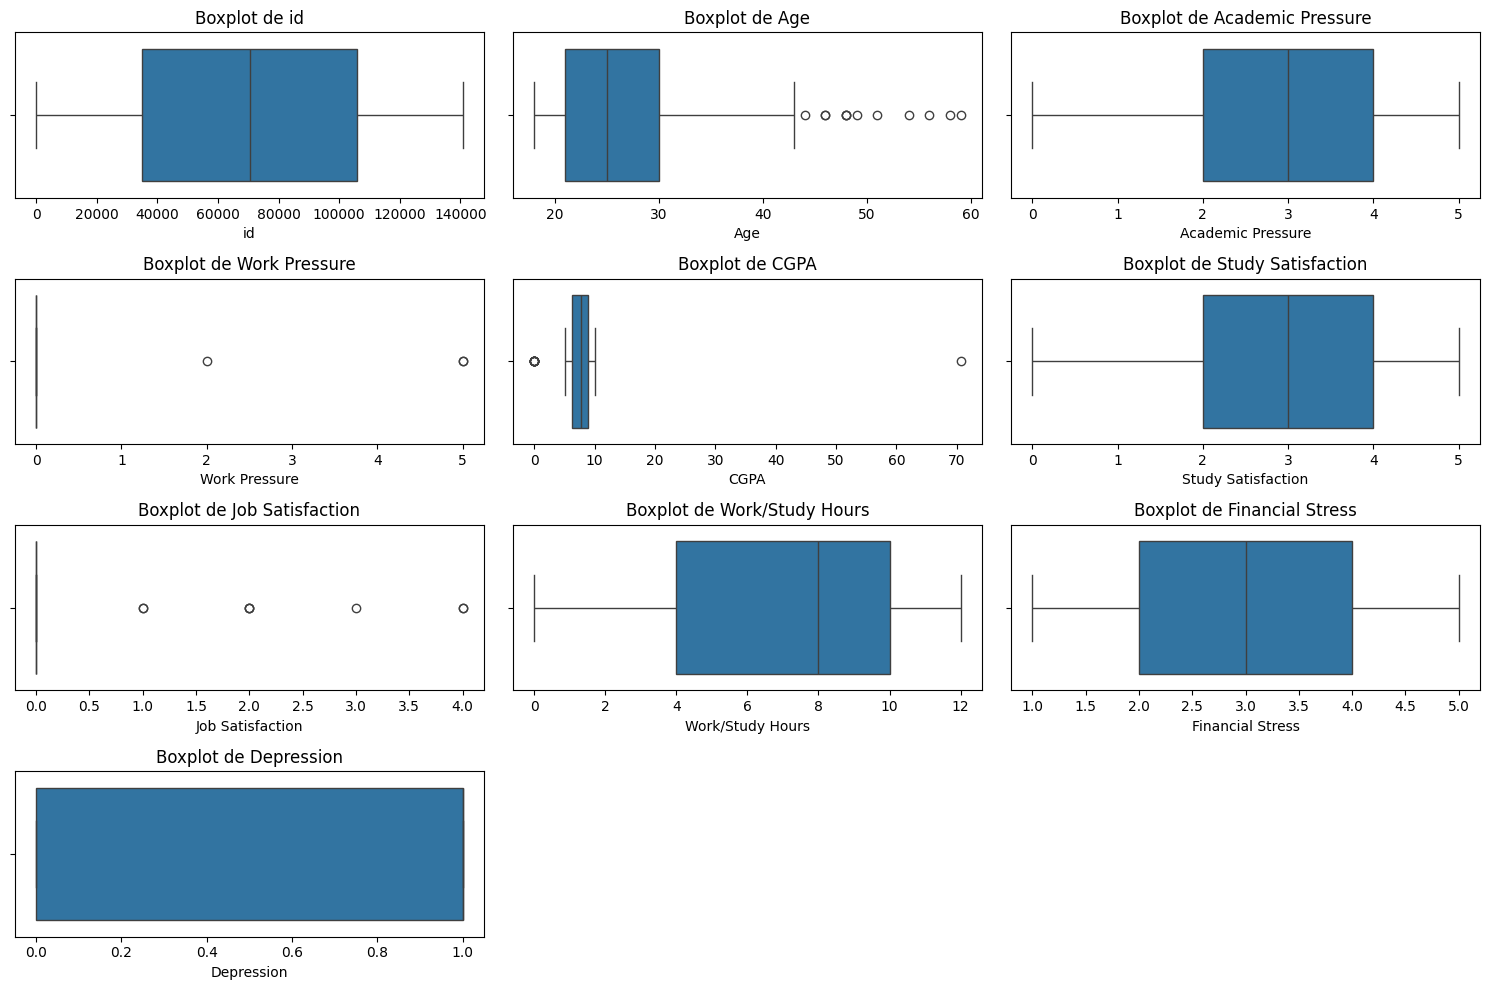

Outliers detectados en 'id' con IQR:
0 outliers encontrados.

Outliers detectados en 'Age' con IQR:
12 outliers encontrados.

Outliers detectados en 'Academic Pressure' con IQR:
0 outliers encontrados.

Outliers detectados en 'Work Pressure' con IQR:
3 outliers encontrados.

Outliers detectados en 'CGPA' con IQR:
10 outliers encontrados.

Outliers detectados en 'Study Satisfaction' con IQR:
0 outliers encontrados.

Outliers detectados en 'Job Satisfaction' con IQR:
8 outliers encontrados.

Outliers detectados en 'Work/Study Hours' con IQR:
0 outliers encontrados.

Outliers detectados en 'Financial Stress' con IQR:
0 outliers encontrados.

Outliers detectados en 'Depression' con IQR:
0 outliers encontrados.



In [ ]:
# Listarcolumnas numéricas del dataset
numerical_cols = df.select_dtypes(include=[np.number]).columns

# 1. Análisis Gráfico de outliers a través de Boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols)//3 + 1, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

# 2. Detección de outliers con IQR en todas las columnas numéricas
outliers_iqr = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Muestro cuántos outliers fueron encontrados en cada columna
    print(f"Outliers detectados en '{col}' con IQR:")
    print(outliers_iqr[col].shape[0], "outliers encontrados.\n")


**Análisis teórico y tratamiento de Outliers**

**Edad**: encontramos 12 outliers en este campo, en este caso decidí mantener estos outliers en el módelo ya que son edades que pertenecen a posible población de adultos mayores que estén realizando estudios. en este caso solo me aseguré que no haya un valor irracional por ejemplo una edad de 200 años

**Work pressure/Job Satisfaction**: estos dos rubros tienen un razonamiento similar, en todo el dataset solo 11 líneas fueron cargadas con un valor distinto de 0(es muy poco en un total de 27901 filas totales)... Por lo tanto interpretamos que esta información no ha sido recolectada correctamente, no puedo sustituir estos 0 por con ninguna estrategia porque no contamos casi con información para hacerlo.

*A efectos prácticos de este proyecto voy a dropear esas columnas para quitar información que no agrega valor, pero en un caso real haría énfasis en la importancia de recoger estos datos correctamente*

De todas formas que considero la medida que habría que tomar es trasladar el mensaje a quien desarrolla la encuesta para darle importancia a estos dos rubros ya que son variables que pueden tener una incidencia directa en la depresión de los estudiantes.


In [ ]:
#Realizo los calculos de cantidad de filas con valores distintos a 0 para argumentar el punto anterior

# Sumar los valores distintos a 0 en 'Work Pressure'
work_pressure_no_0 = df[df['Work Pressure'] != 0]['Work Pressure'].count()

# Sumar los valores distintos a 0 en 'Job Satisfaction'
job_satisfaction_no_0 = df[df['Job Satisfaction'] != 0]['Job Satisfaction'].count()

print(f"Cantidad de valores distintos a 0 en 'Work Pressure': {work_pressure_no_0}")
print(f"Cantidad de valores distintos a 0 en 'Job Satisfaction': {job_satisfaction_no_0}")

Cantidad de valores distintos a 0 en 'Work Pressure': 3
Cantidad de valores distintos a 0 en 'Job Satisfaction': 8


In [ ]:
#Basados en los comentarios de este rubro proceso a dropear estas columnas para no agregar ruido al análisis
df = df.drop(['Work Pressure', 'Job Satisfaction'], axis=1)

**CGPA - (rendimiento académico)**: En este caso el rango de valores debe ir entre 0.1 y 10, tenemos algunos 0(casos que falto completar la información) y un valor muy por encima del rango(posible error de digitación). para este caso la estrategia que voy a utilizar es que si el modelo encuentra un valor por fuera del rango aceptable, lo sustituya por la moda

In [ ]:
# Calculo la moda de la columna CGPA
mode_cgpa = df['CGPA'].mode()[0]  # mode()[0] selecciona el primer valor de la moda, en caso de que haya múltiples modas

# Reemplazo los valores fuera del rango [0.1, 10] con la moda
df['CGPA'] = df['CGPA'].apply(lambda x: mode_cgpa if x < 0.1 or x > 10 else x)

# para verificar que el reemplazo haya sido correcto cuento los valores fuera del rango [0.1, 10] después del reemplazo
outliers_count = df[(df['CGPA'] == 0) | (df['CGPA'] > 10)].shape[0]
print(f"Número de valores fuera del rango [0.1, 10]: {outliers_count}")

Número de valores fuera del rango [0.1, 10]: 0


En último lugar para la transformación de datos necesito convertir a numérico la información en el campo "Sleep Duration" con esto podré realizar análisis estadísticos. para ello voy a usar el siguiente criterio. crearé un diccionario que basados en la opción elegida se asigne un número de la siguiente Forma:
 Less than 5 hours: 4,
 5-6 hours: 5.5,
 7-8 hours: 7.5,
 More than 8 hours: 9,
 Others: 6

In [ ]:
#Imprimo todas las posibles clasificaciones que hay en la columna para luego armar un diccionario que pueda convertir a numérico
print(df['Sleep Duration'].unique())

['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']


In [ ]:
# Calculo la moda antes de mapear (en texto)
moda_SD_texto = df['Sleep Duration'].mode()[0]

# Diccionario de mapeo
sleep_mapping = {
    'Less than 5 hours': 4,
    '5-6 hours': 5.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 9,
    'Others': moda_SD_texto  # Reemplazo 'Others' por la moda antes de mapear
}

# Aplico la conversión de texto a valores numéricos
df['Sleep Duration'] = df['Sleep Duration'].map(sleep_mapping)

# Convierto a numérico
df['Sleep Duration'] = pd.to_numeric(df['Sleep Duration'], errors='coerce')

# Relleno valores nulos con la moda después de la conversión
moda_SD_numerica = df['Sleep Duration'].mode()[0]
df['Sleep Duration'] = df['Sleep Duration'].fillna(moda_SD_numerica)

# Verifico valores nulos
nulos_SD = df['Sleep Duration'].isnull().sum()
print(f"Cantidad de valores nulos en 'Sleep Duration': {nulos_SD}")

Cantidad de valores nulos en 'Sleep Duration': 0


In [ ]:
#por último luego de finalizadas las transformaciones realizo un head nuevamente para visualizar los cambios realizados
df.head()

#y un info para confirmar no haya quedado ningún valor incorrecto
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    27901 non-null  int64  
 1   Gender                                27901 non-null  object 
 2   Age                                   27901 non-null  float64
 3   City                                  27901 non-null  object 
 4   Profession                            27901 non-null  object 
 5   Academic Pressure                     27901 non-null  float64
 6   CGPA                                  27901 non-null  float64
 7   Study Satisfaction                    27901 non-null  float64
 8   Sleep Duration                        27901 non-null  float64
 9   Dietary Habits                        27901 non-null  object 
 10  Degree                                27901 non-null  object 
 11  Have you ever h

# **Análisis Univariado**

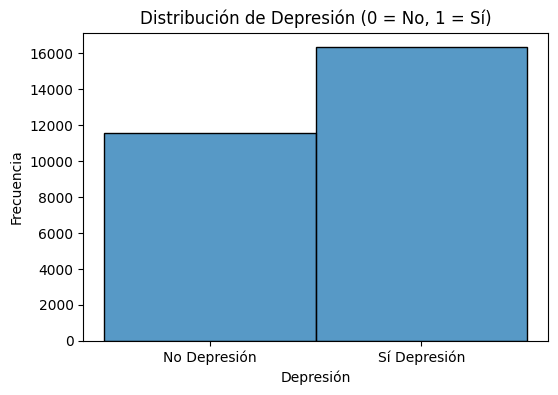

                Age  Academic Pressure          CGPA  Study Satisfaction  \
count  27901.000000       27901.000000  27901.000000        27901.000000   
mean      25.822300           3.141214      7.658733            2.943837   
std        4.905687           1.381465      1.464276            1.361148   
min       18.000000           0.000000      5.030000            0.000000   
25%       21.000000           2.000000      6.290000            2.000000   
50%       25.000000           3.000000      7.770000            3.000000   
75%       30.000000           4.000000      8.920000            4.000000   
max       59.000000           5.000000     10.000000            5.000000   

       Sleep Duration  Work/Study Hours  Financial Stress  
count    27901.000000      27901.000000      27901.000000  
mean         6.337031          7.156984          3.139867  
std          1.917781          3.707642          1.437269  
min          4.000000          0.000000          1.000000  
25%          4.

In [ ]:
# Histograma de la depresión
plt.figure(figsize=(6,4))
sns.histplot(df['Depression'], bins=2, discrete=True)

# Configurar el eje X para mostrar solo 0 y 1
plt.xticks([0, 1], labels=['No Depresión', 'Sí Depresión'])

# Etiquetas y título
plt.title('Distribución de Depresión (0 = No, 1 = Sí)')
plt.xlabel('Depresión')
plt.ylabel('Frecuencia')

plt.show()


# Resumen estadístico de las variables numéricas
print(df[['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress']].describe())

**Interpretación del análisis Univariado**

**Individuos con depresión**: podemos ver que un poco más de 16.000 estudiantes están considerados con depresión, mientras que un poco menos de 12.000 no. Por lo tanto el grupo mayoritario es el de estudiantes con depresión

**Edad**:La mayoría de los estudiantes tienen entre 25 y 26 años, Aunque el grueso de la población es joven, algunos estudiantes mayores están en el estudio.Hay una mayoría de estudiantes jóvenes, pero también algunos más adultos.

**Presión Académica**: En promedio, los estudiantes experimentan un nivel medio de presión académica de 3.14 puntos sobre 5.

**CGPA**: tenemos un rendimiento académico promedio bastante bueno de 7.66 sobre 10. La mayoría tiene un desempeño académico sólido, aunque algunos pueden estar en riesgo por calificaciones bajas.

**Satisfacción con el Estudio**:Nivel medio de satisfacción con los estudios 2.94 sobre 5.  La satisfacción académica es variable, con algunos estudiantes insatisfechos que podrían estar en riesgo de estrés o depresión.

**Horas de Trabajo/Estudio**:Los estudiantes trabajan o estudian alrededor de 7 horas al día en promedio. Estas horas de estudio varían enormemente, lo que puede afectar el estrés y la salud mental.

**Estrés Financiero**:Un nivel medio de estrés financiero con 3.14 sobre 5, el estrés financiero es un factor importante y podría estar relacionado con el riesgo de depresión.

a modo de resumen general identifico alta presión académica y baja satisfacción con el estudio podrían estar correlacionadas con la depresión, El estrés financiero y las largas jornadas de estudio/trabajo pueden aumentar el riesgo de problemas de salud mental, Las calificaciones más bajas pueden estar relacionadas con la presión académica y la satisfacción con el estudio.

# **Análisis Bivariado**

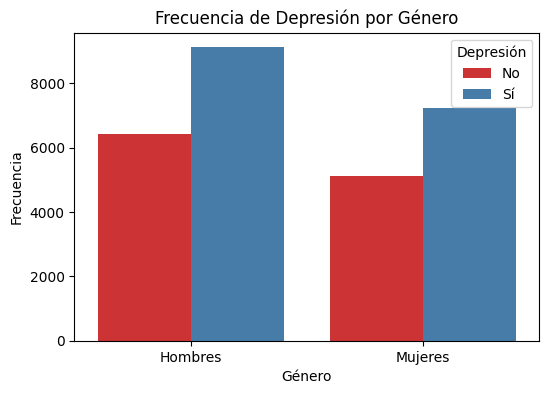

Prueba T - Depresión por Género: p-value = 0.76439
No hay una diferencia significativa entre la depresión según el género.


In [ ]:
# Boxplot: Comparación de depresión por género
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Depression', data=df, palette='Set1')

plt.title('Frecuencia de Depresión por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')

# Renombro etiquetas en el eje X
plt.xticks(ticks=[0,1], labels=['Hombres', 'Mujeres'])

plt.legend(title='Depresión', labels=['No', 'Sí'])
plt.show()

# Prueba T - para ver si hay diferencias significativas en depresión según género
male_depression = df[df['Gender'] == 'Male']['Depression']
female_depression = df[df['Gender'] == 'Female']['Depression']
t_stat, p_value = stats.ttest_ind(male_depression, female_depression)

print(f"Prueba T - Depresión por Género: p-value = {p_value:.5f}")
if p_value < 0.05:
    print("Hay una diferencia significativa en la depresión según el género.")
else:
    print("No hay una diferencia significativa entre la depresión según el género.")



En hombre y mujeres, la cantidad de personas sin depresión es menor que la cantidad de personas con depresión.
A simple vista, parece que hay una diferencia en las proporciones entre géneros, pero es necesario confirmar si es estadísticamente significativa.para ello realicé la prueba T, de la cual concluímos que como el resultado: 0.76439 > 0.05, con este resultado NO se puede afirmar que el género influya significativamente en los niveles de depresión en esta muestra

In [ ]:
categorical_vars = ['Gender', 'City', 'Profession', 'Dietary Habits',
                    'Degree', 'Have you ever had suicidal thoughts?',
                    'Family History of Mental Illness']

for col in categorical_vars:
    print(f"{col}: {df[col].unique()}")

df.head()


Gender: ['Male' 'Female']
City: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
Profession: ['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
Dietary Habits: ['Healthy' 'Moderate' 'Unhealthy' 'Others']
Degree: ['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'Class 12' 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,5.5,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,5.90,5.0,5.5,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,7.03,5.0,4.0,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,5.59,2.0,7.5,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,8.13,3.0,5.5,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
#voy a comenzar por la conversión de las variables Binarias (Pensamientos suicidades y historia familiar de enfermedades mentales) asginaré 0 a NO y 1 a Sí
binarias = ['Have you ever had suicidal thoughts?', 'Family History of Mental Illness']

for col in binarias:
    df[col] = df[col].map({'No': 0, 'Yes': 1})

#en segundo lugar sigo con las ordinales asignando un número a cada categoría
dieta_mapping = {'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3, 'Others':4}
df['Dietary Habits'] = df['Dietary Habits'].map(dieta_mapping)

genero_mapping = {'Male': 1, 'Female': 2}
df['Gender'] = df['Gender'].map(genero_mapping)

#Por último, para las variables nominales usaré Label Encoding para codificar cada categoría con un número específico

from sklearn.preprocessing import LabelEncoder

for col in ['City', 'Profession', 'Degree']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,51,11,5.0,8.97,2.0,5.5,3,3,1,3.0,1.0,0,1
1,8,2,24.0,3,11,2.0,5.90,5.0,5.5,2,10,0,3.0,2.0,1,0
2,26,1,31.0,44,11,3.0,7.03,5.0,4.0,3,5,0,9.0,1.0,1,0
3,30,2,28.0,49,11,3.0,5.59,2.0,7.5,2,7,1,4.0,5.0,1,1
4,32,2,25.0,16,11,4.0,8.13,3.0,5.5,2,17,1,1.0,1.0,0,0


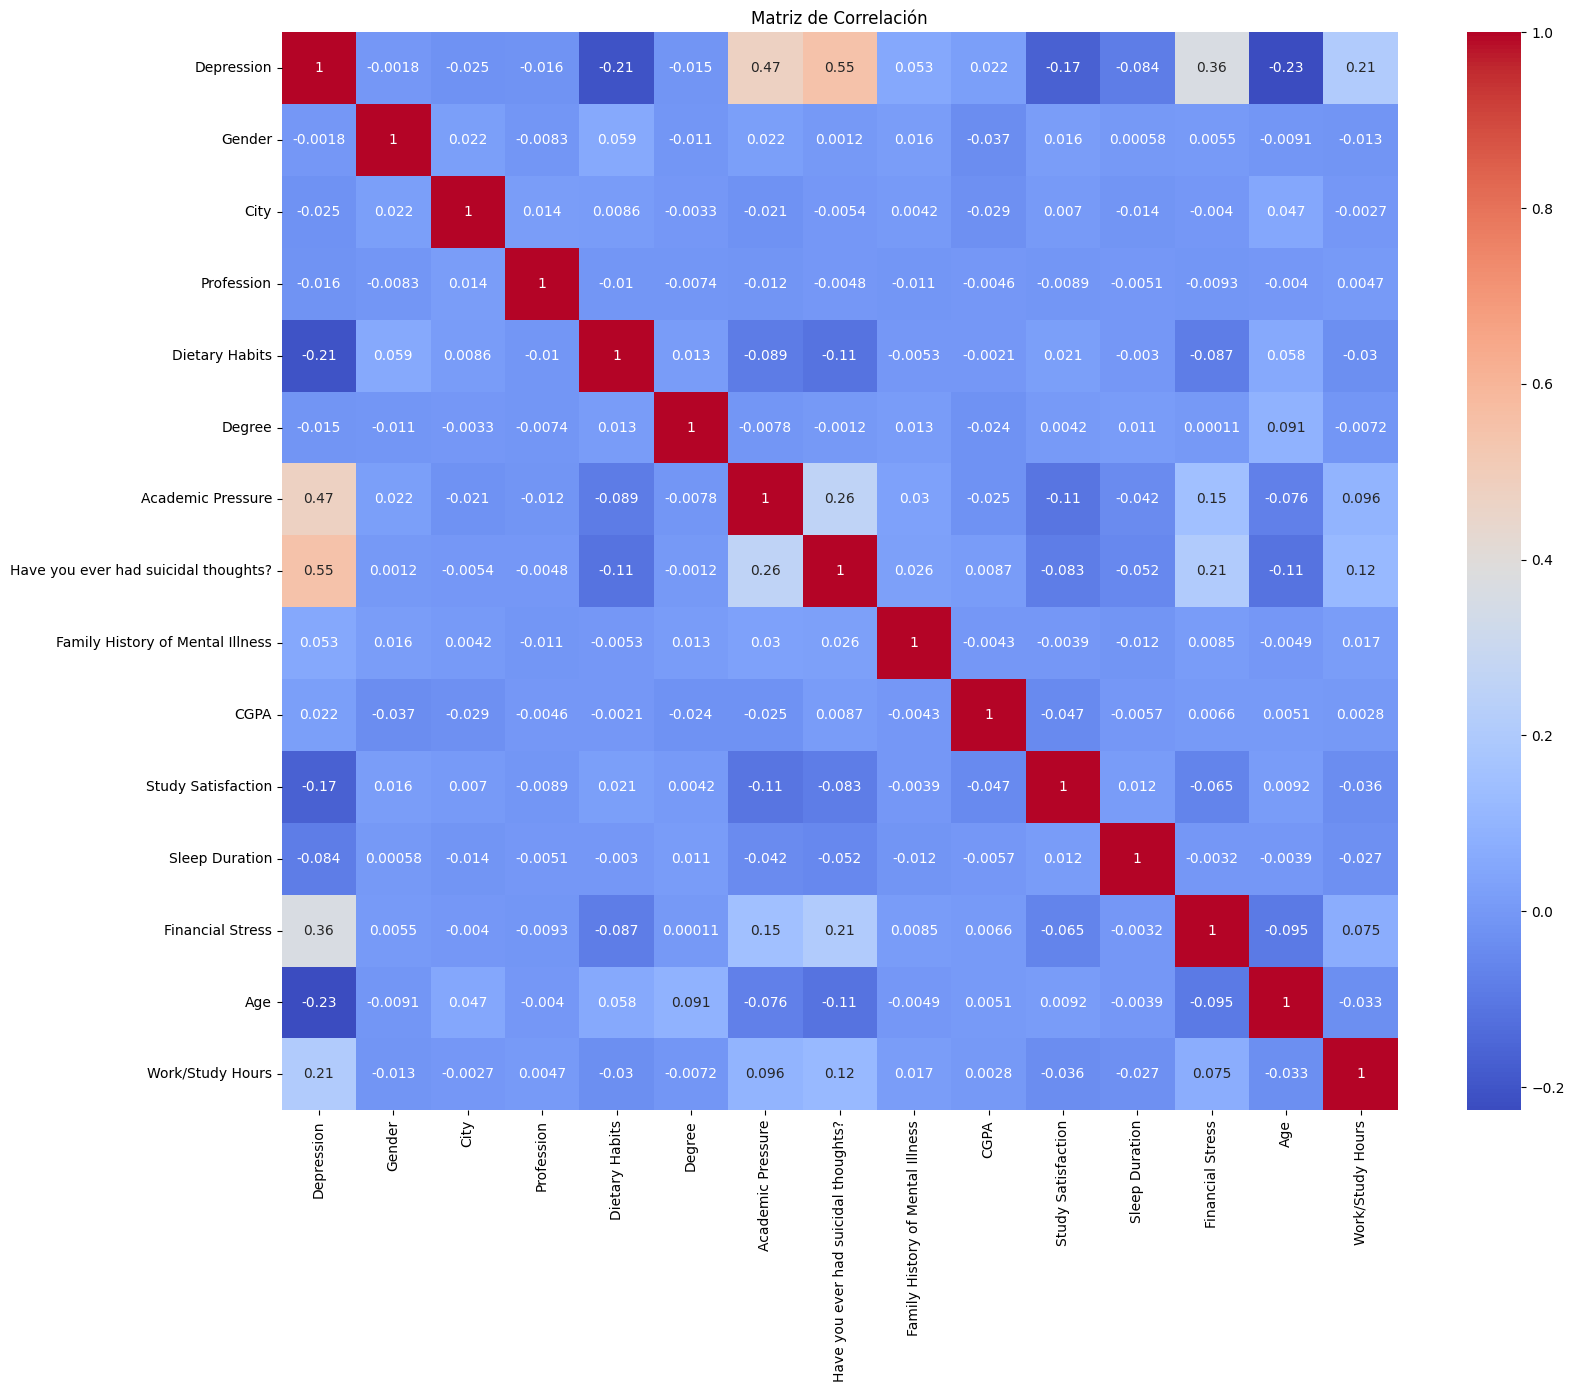

In [ ]:
# Finalmente con el head del paso anterior puedo validar que todas las columnas se convirtieron a numéricas y por lo tanto puedo armar mi matriz de correlación completa
plt.figure(figsize=(18,14))
sns.heatmap(df[['Depression', 'Gender','City','Profession','Dietary Habits','Degree','Academic Pressure','Have you ever had suicidal thoughts?','Family History of Mental Illness', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Financial Stress','Age','Work/Study Hours']].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

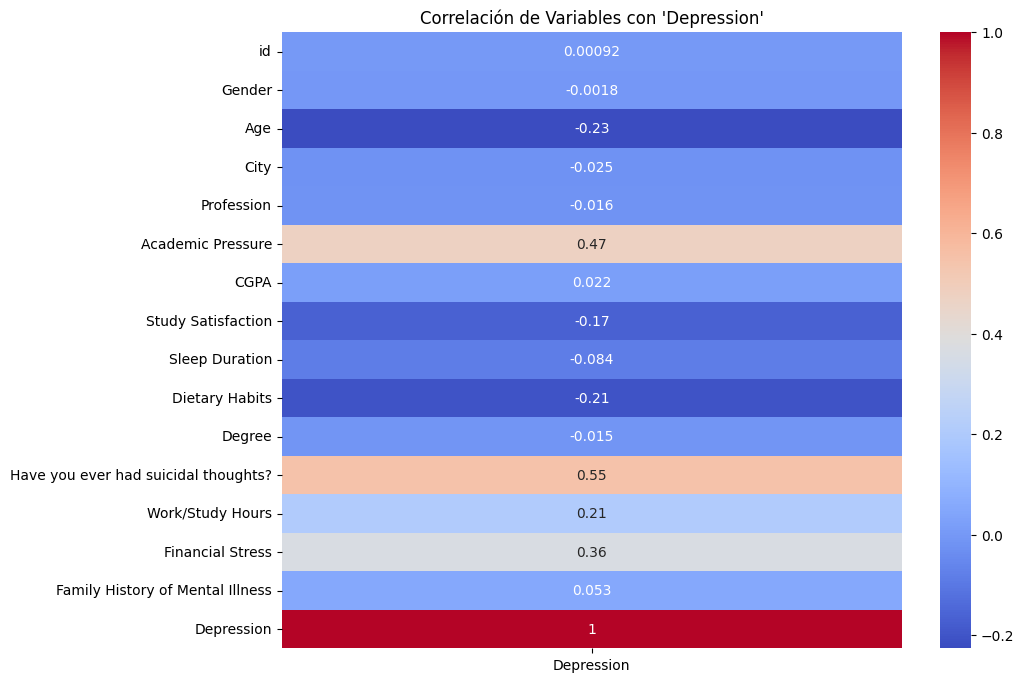

In [ ]:
plt.figure(figsize=(10,8))
correlation_matrix = df.corr()[['Depression']]  # Seleccionar solo la columna de correlación con 'Depression'
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlación de Variables con 'Depression'")
plt.show()

Para el análisis de esta Matriz me voy a enfocar en la relación siempre contra mi variable objetivo que es determinar si el individuo tiene depresión o no.

**Variables con Correlación positiva respecto a "Depresión"**

"Have you ever had suicidal thoughts?" (0.55) : Existe una fuerte relación entre haber tenido pensamientos suicidas y la presencia de depresión. Esto es esperable, ya que la depresión es un factor de riesgo clave para pensamientos suicidas.
"Academic Pressure" (0.47) : Un alto nivel de presión académica está relacionado con mayores niveles de depresión. indica que el estrés educativo es un factor relevante a considerar.
"Financial Stress" (0.36) : Problemas financieros también tienen una relación positiva con la depresión, lo que sugiere que la incertidumbre económica puede afectar la salud mental de los individuos.
"Work/Study Hours" (0.21) : Puede indicar que quienes trabajan o estudian por más tiempo pueden experimentar más depresión, aunque la correlación no es alta.

**Variables con correlación positiva respecto a "Depresión"**

"Age" (-0.23) : Existe una ligera tendencia a que personas más jóvenes tengan mayor depresión. Puede estar asociado con la falta de estabilidad o mayor presión académica y social en edades tempranas, también puede suponer que las personas que realizan estudios y están más avanzados en edad lo hacen por convencimiento y disfrute de la carrera y no tienen la necesidad de cumplir mandatos familiares.
"Dietary Habits" (-0.21) : Parece haber una relación negativa entre hábitos alimenticios y depresión, lo que indica que una alimentación más saludable podría estar asociada con menores niveles de depresión. Esto concuerda con investigaciones previas que relacionan una dieta equilibrada con una mejor salud mental, mientras que una dieta pobre en nutrientes podría agravar los síntomas depresivos.
"Study Satisfaction" (-0.17) : A mayor satisfacción con los estudios, menor probabilidad de depresión. Esto sugiere que disfrutar del proceso educativo puede ser un factor protector.



# **Análisis Multivariado**

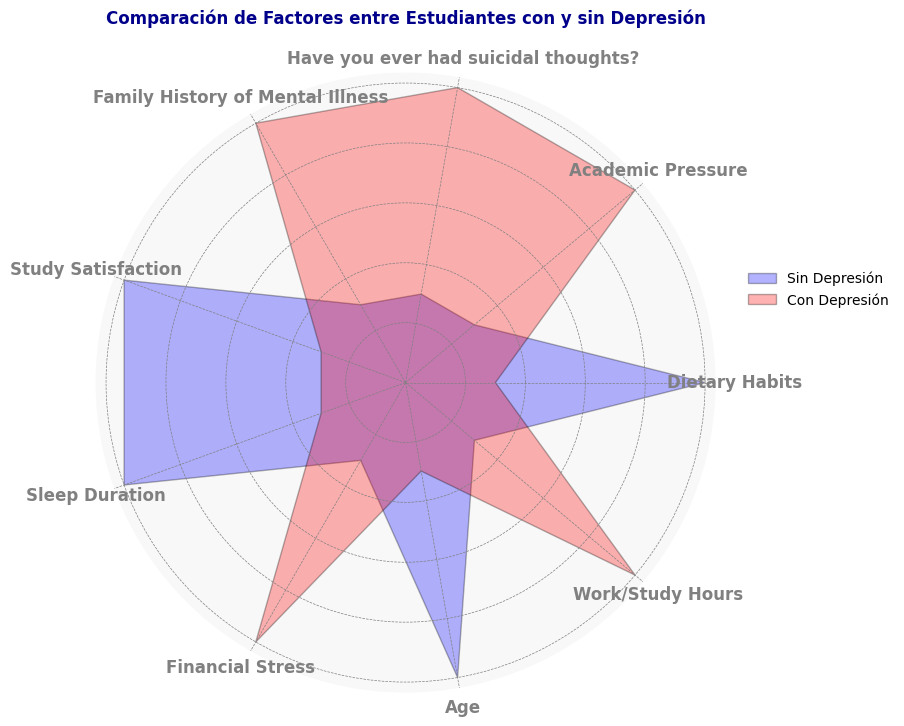

In [ ]:
# Selecciono  variables para el análisis
variables = [
    'Dietary Habits','Academic Pressure','Have you ever had suicidal thoughts?','Family History of Mental Illness', 'Study Satisfaction', 'Sleep Duration', 'Financial Stress','Age','Work/Study Hours',
]

# Calculo la media de cada variable para estudiantes con y sin depresión
grouped_data = df.groupby("Depression")[variables].mean()

# Normalizo los valores entre 0 y 1
grouped_data = (grouped_data - grouped_data.min()) / (grouped_data.max() - grouped_data.min())

# Aplico un desplazamiento mínimo para evitar valores demasiado bajos
offset = 0.3
grouped_data = grouped_data * (1 - offset) + offset

# Convierto los datos a listas
labels = grouped_data.columns
values_no_depression = grouped_data.loc[0].tolist()  # Estudiantes sin depresión
values_depression = grouped_data.loc[1].tolist()  # Estudiantes con depresión

# Agrego el primer valor al final para cerrar el radar
values_no_depression += values_no_depression[:1]
values_depression += values_depression[:1]

# Creo el radar chart
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Cerrar el gráfico

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values_no_depression, color="blue", alpha=0.3, label="Sin Depresión", edgecolor="black")
ax.fill(angles, values_depression, color="red", alpha=0.3, label="Con Depresión", edgecolor="black")

# Estilizar gráfico
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, color='gray', fontsize=12, fontweight='bold')
ax.set_yticklabels([])  # Eliminar etiquetas de los ejes radiales
ax.spines['polar'].set_visible(False)  # Ocultar borde circular


# Añadir círculos para mejorar la apariencia
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_facecolor('#f8f8f8')  # Fondo del gráfico

# Añadir leyenda y título
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.3, 0.7), frameon=False, fontsize=10)
plt.title("Comparación de Factores entre Estudiantes con y sin Depresión", size=12, weight='bold', color='darkblue', pad=35)
plt.subplots_adjust(top=1.9, bottom=0.2)  # Ajusta el margen inferior

plt.show()

El gráfico de radar nos permite visualizar de manera clara y comparativa las características de los individuos con y sin depresión. Este tipo de análisis nos proporciona un perfil de los estudiantes, lo cual es útil para proyectar y suponer, con base en las realidades observadas, quiénes podrían estar en riesgo de padecer depresión.

En este caso, se observa que los individuos sin depresión presentan valores más altos en aspectos clave como la satisfacción con sus estudios, las horas de sueño, los hábitos alimenticios y la edad. Las tres primeras variables están estrechamente relacionadas con el bienestar emocional y la salud física. Una mayor satisfacción con los estudios sugiere un mayor equilibrio emocional, mientras que una buena cantidad de horas de sueño y hábitos alimenticios saludables son factores fundamentales para el bienestar físico y emocional. En cuanto a la edad, como se mencionó anteriormente, puede estar relacionada con factores sociales, como el nivel de autonomía o la falta de presiones externas, lo cual puede contribuir a un mayor bienestar general.

Por su parte los individuos con depresión muestran valores significativamente más altos en variables como historia familiar con antecedentes de problemas mentales, pensamientos suicidas, cantidad de horas de estudio y trabajo, estrés financiero y presión académica. Estos factores sugieren que existen múltiples tensores que afectan el bienestar emocional y psicológico de estas personas.

Historia familiar con antecedentes de problemas mentales está relacionado con una predisposición genética o ambiental que puede aumentar el riesgo de sufrir trastornos mentales, incluida la depresión.
Pensamientos suicidas son una indicación clara de un sufrimiento profundo, y su presencia resalta la gravedad de la situación emocional en estos individuos.
Horas de estudio y trabajo son factores que, si bien pueden asociarse a la carga académica, también pueden reflejar una sobrecarga de responsabilidades que genera agotamiento y estrés crónico.
Estrés financiero es un factor externo que puede agravar el estado emocional, ya que las preocupaciones económicas tienen un impacto directo en la estabilidad psicológica.
Presión académica genera ansiedad constante por cumplir con expectativas externas, lo que contribuye a la sensación de insuficiencia y agotamiento emocional.
Este conjunto de factores muestra cómo el entorno y las experiencias personales pueden influir significativamente en el estado mental de los estudiantes, aumentando su vulnerabilidad a la depresión. Estos patrones permiten reconocer áreas clave donde se podrían implementar estrategias de intervención para mejorar la salud mental y reducir el riesgo de desarrollar trastornos graves.







# **Proyecto de ML**

Para comenzar voy a poner en práctica 3 modelos Regresión Logística, Random Forest y XGBost... una vez desarrollados realizaré un análisis comparativo para determinar que modelo utilizar en base a los resultados arrojados

In [ ]:
#Primero a modo de repaso voy a imprimir un Head
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    27901 non-null  int64  
 1   Gender                                27901 non-null  int64  
 2   Age                                   27901 non-null  float64
 3   City                                  27901 non-null  int64  
 4   Profession                            27901 non-null  int64  
 5   Academic Pressure                     27901 non-null  float64
 6   CGPA                                  27901 non-null  float64
 7   Study Satisfaction                    27901 non-null  float64
 8   Sleep Duration                        27901 non-null  float64
 9   Dietary Habits                        27901 non-null  int64  
 10  Degree                                27901 non-null  int64  
 11  Have you ever h

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:18:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Resultados de los modelos:
Regresión Logística: 0.7848
Random Forest: 0.7567
XGBoost: 0.7785


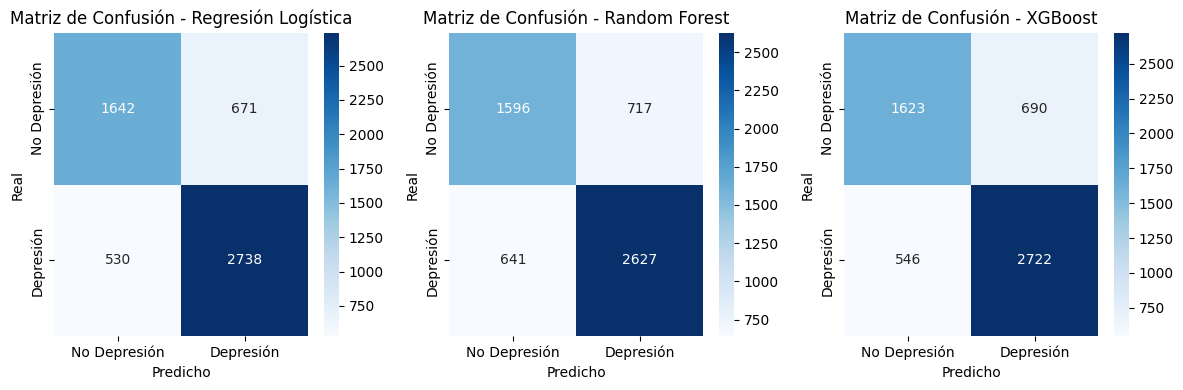


Reporte de clasificación para Regresión Logística:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      2313
           1       0.80      0.84      0.82      3268

    accuracy                           0.78      5581
   macro avg       0.78      0.77      0.78      5581
weighted avg       0.78      0.78      0.78      5581


Reporte de clasificación para Random Forest:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      2313
           1       0.79      0.80      0.79      3268

    accuracy                           0.76      5581
   macro avg       0.75      0.75      0.75      5581
weighted avg       0.76      0.76      0.76      5581


Reporte de clasificación para XGBoost:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72      2313
           1       0.80      0.83      0.81      3268

    accuracy                           0.78 

In [ ]:
#construcción de mis 3 modelos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



# Variables a utilizar
features = [
    "Academic Pressure", "Financial Stress", "Sleep Duration", "Dietary Habits",
    "Study Satisfaction", "CGPA", "Work/Study Hours"
]
target = "Depression"  # Columna objetivo

# Separo datos en características (X) y variable objetivo (y)
X = df[features]
y = df[target]

# Divido en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Estandarizo características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creo diccionario para almacenar resultados
model_results = {}

### 1 - Modelo: Regresión Logística
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
model_results["Regresión Logística"] = accuracy_score(y_test, y_pred_log)

### 2️ - Modelo: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
model_results["Random Forest"] = accuracy_score(y_test, y_pred_rf)

### 3 - Modelo: XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
model_results["XGBoost"] = accuracy_score(y_test, y_pred_xgb)

#  Análisis comparativo de resultados
print("Resultados de los modelos:")
for model, accuracy in model_results.items():
    print(f"{model}: {accuracy:.4f}")

#  Reporte de clasificación y matriz de confusión
models = {
    "Regresión Logística": y_pred_log,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

plt.figure(figsize=(12, 4))
for i, (name, y_pred) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Depresión", "Depresión"], yticklabels=["No Depresión", "Depresión"])
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")

plt.tight_layout()
plt.show()

# Reporte detallado
for name, y_pred in models.items():
    print(f"\nReporte de clasificación para {name}:")
    print(classification_report(y_test, y_pred))

XGBoost y Regresión Logística presentan los mejores resultados con un accuracy de 0.78.

XGBoost tiene un recall ligeramente menor que Regresión Logística (0.83 vs. 0.84), pero la diferencia es mínima.

Random Forest tiene el peor desempeño general con 0.76 de accuracy y menor recall.

De momento puedo optar por regresión logística o XGBoost ya que obtengo resultados similares, voy a aplicar hiperparámetros para intentar mejorar los resultados


En el siguiente paso y con el objetivo de mejorar mis resultados voy a utilizar algunas técnicas e hiperparámetros que me permitan mejorar mi modelo

**Balanceo de clases con SMOTE:** Balanceo mis clases para evitar sesgos de mi dataset esto me va permitir mejorar la precisión de las predicciones en la clase minoritaria ( "Depresión") sin perder el rendimiento en la clase mayoritaria. Esto contribuye a un modelo más balanceado y robusto.

**Optimización de Hiperparámetros con RandomizedSearchCV:**:  para buscar los mejores hiperparámetros de manera más eficiente que una búsqueda en cuadrícula (GridSearch), sin necesidad de evaluar todas las combinaciones posibles. Mi objetivo con esto es obtener una configuración de hiperparámetros que maximice el rendimiento del modelo en términos de precisión, recall, F1-score, etc.

**Estandarización de características**: La estandarización es especialmente útil para modelos como la Regresión Logística o SVM, ya que estos modelos son sensibles a la escala de las características. Estandarizar me va a ayudar a mejorar la convergencia y el rendimiento. mi objetivo con esto es asegurar que todas las características estén en una escala comparable para que los modelos no favorezcan características con mayor varianza.

Resultados de Logistic Regression:
Accuracy: 0.8584544758990054
Reporte de clasificación:
              precision    recall  f1-score      support
0              0.861350  0.855837  0.858584  3281.000000
1              0.855573  0.861094  0.858324  3254.000000
accuracy       0.858454  0.858454  0.858454     0.858454
macro avg      0.858461  0.858465  0.858454  6535.000000
weighted avg   0.858473  0.858454  0.858455  6535.000000


Resultados de Random Forest:
Accuracy: 0.8612088752869166
Reporte de clasificación:
              precision    recall  f1-score      support
0              0.870706  0.849741  0.860096  3281.000000
1              0.852085  0.872772  0.862305  3254.000000
accuracy       0.861209  0.861209  0.861209     0.861209
macro avg      0.861396  0.861256  0.861200  6535.000000
weighted avg   0.861434  0.861209  0.861196  6535.000000


Resultados de XGBoost:
Accuracy: 0.8648814078041316
Reporte de clasificación:
              precision    recall  f1-score      support
0  

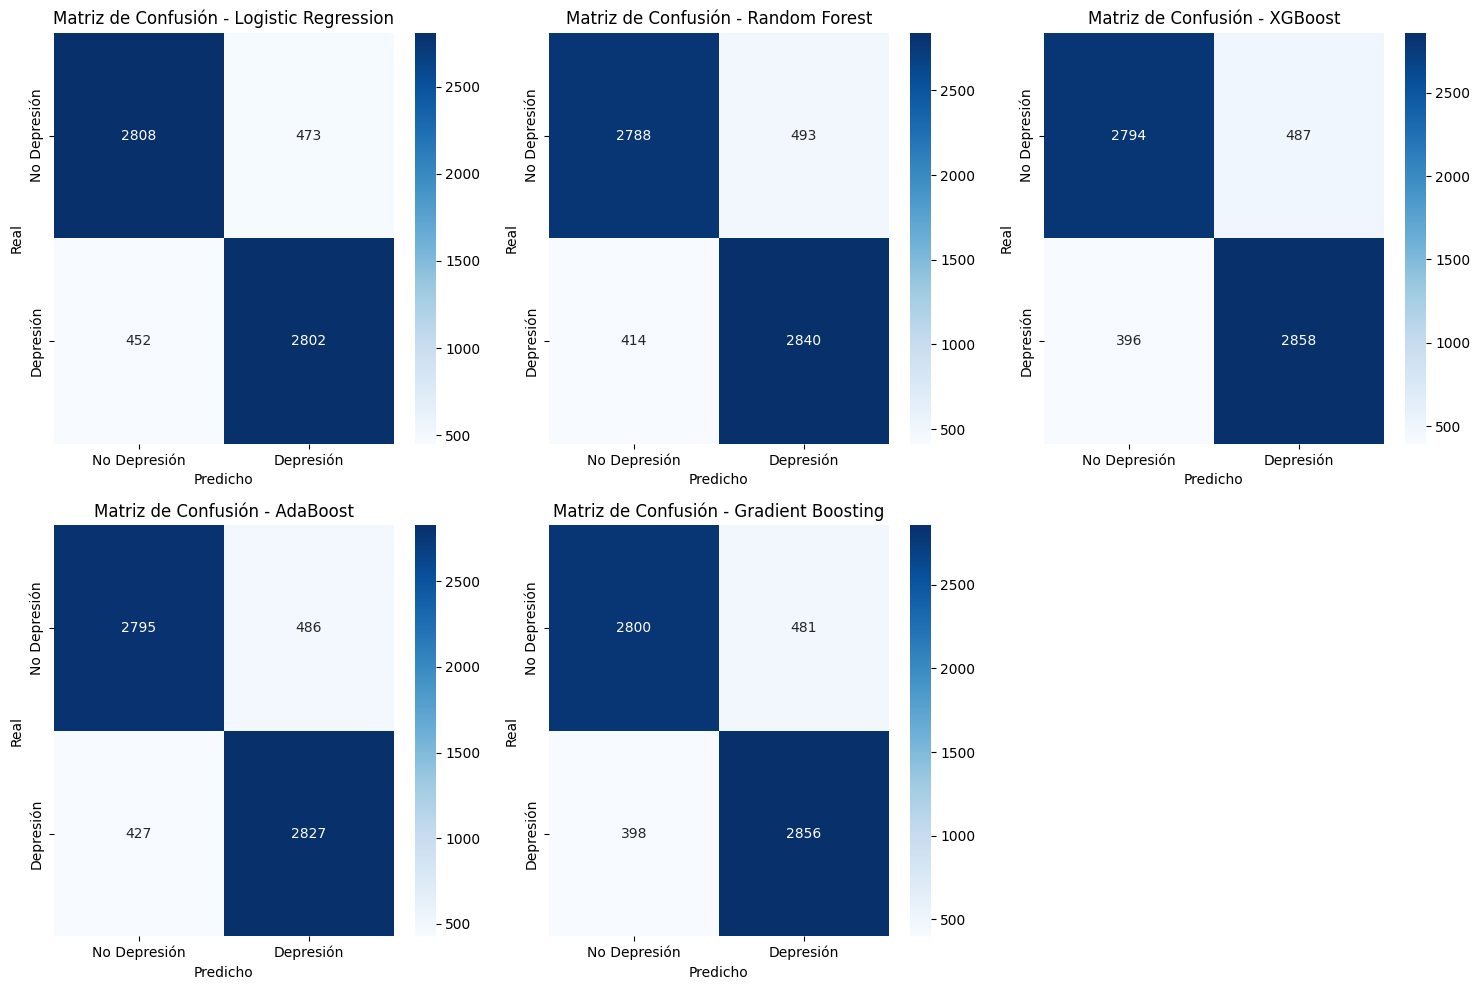

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Recordar 'Depression' es la columna objetivo
X = df.drop(columns=['Depression'])  # Elimino la columna 'Depression' para obtener las características
y = df['Depression']  # La columna 'Depression' es nuestra variable objetivo, por eso la considero mi y

# Balanceo las clases usando SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Divido en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defino los modelos con sus hiperparámetros
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Hiperparámetros para RandomizedSearchCV
param_distributions_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_distributions_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

#  RandomizedSearchCV para Random Forest y XGBoost
rf_random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions_rf, n_iter=5, random_state=42)
xgb_random_search = RandomizedSearchCV(XGBClassifier(), param_distributions_xgb, n_iter=5, random_state=42)

# Entrenamiento y evaluación de cada modelo
results = {}
y_preds = {}  # Guardo las predicciones para la visualización
for model_name, model in models.items():
    if model_name == 'Random Forest':
        model = rf_random_search.fit(X_train, y_train).best_estimator_
    elif model_name == 'XGBoost':
        model = xgb_random_search.fit(X_train, y_train).best_estimator_

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_preds[model_name] = y_pred  # Guardamos las predicciones

    # Guardar resultados
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': report
    }

# Imprimir resultados
for model_name, result in results.items():
    print(f"Resultados de {model_name}:")
    print(f"Accuracy: {result['accuracy']}")
    print("Reporte de clasificación:")
    print(pd.DataFrame(result['classification_report']).transpose())
    print("\n")

# Matrices de confusión
plt.figure(figsize=(15, 10))
for i, (name, y_pred) in enumerate(y_preds.items(), 1):
    plt.subplot(2, 3, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Depresión", "Depresión"], yticklabels=["No Depresión", "Depresión"])
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")

plt.tight_layout()
plt.show()


**Conclusiones finales de los modelos desarrollados**

Se observa que todos los modelos mejoraron significativamente respecto a los resultados iniciales, donde la precisión de la Regresión Logística era 0.7848, el Random Forest 0.7567 y el XGBoost 0.7785. En los resultados finales, los modelos alcanzaron precisiones más altas, con el Logistic Regression logrando un 0.858, Random Forest un 0.859, XGBoost un 0.864, AdaBoost un 0.860, y Gradient Boosting un 0.865.

Una de las mejoras notables es el rendimiento consistente de los modelos basados en técnicas de ensamble (como XGBoost, AdaBoost y Gradient Boosting), los cuales presentan un incremento notable en la precisión y otros indicadores como el recall y f1-score. Estos métodos parecen haber logrado una mejor generalización y manejo de los desbalances de clases en comparación con los modelos iniciales. Específicamente, Gradient Boosting y XGBoost se destacan al lograr la mayor precisión, 0.865 y 0.864 respectivamente, ambos con una excelente capacidad para equilibrar precisión y recall en ambas clases (0 y 1), lo que se refleja en sus altos f1-scores.

Si bien AdaBoost mostró una precisión de 0.860, le sigue muy de cerca y podría considerarse como una alternativa viable, aunque no supera el desempeño de Gradient Boosting y XGBoost. Por su parte, los modelos clásicos como Regresión Logística y Random Forest mostraron mejoras más modestas, con el primero alcanzando un 0.858 y el segundo un 0.859, sin llegar a los niveles de las técnicas de ensamble.

Dados estos resultados optimizados voy a definir como modelo final Gradient Boosting. Este modelo no solo logró la precisión más alta, sino que también exhibió una distribución más equilibrada entre las métricas de precisión, recall y f1-score, lo cual es clave en escenarios donde las dos clases tienen importancia comparable, como en la predicción de la depresión. Además, Gradient Boosting es robusto frente a overfitting y puede manejar bien las interacciones no lineales, lo que le otorga una ventaja decisiva en este tipo de problemas.

# **Puesta en práctica del modulo final**



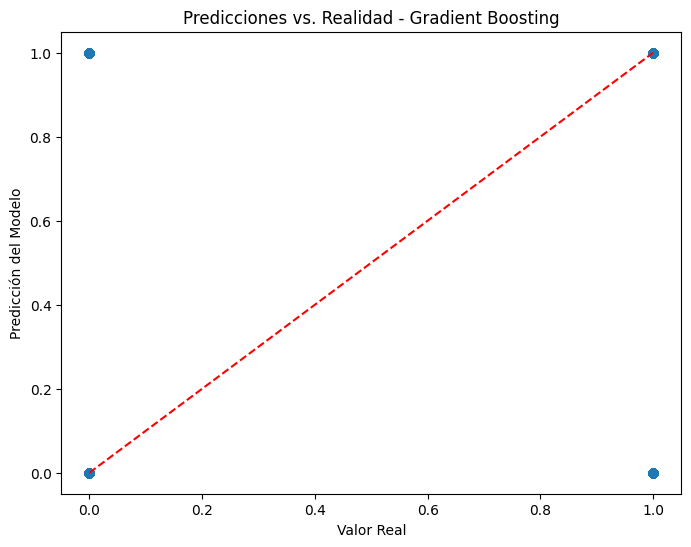

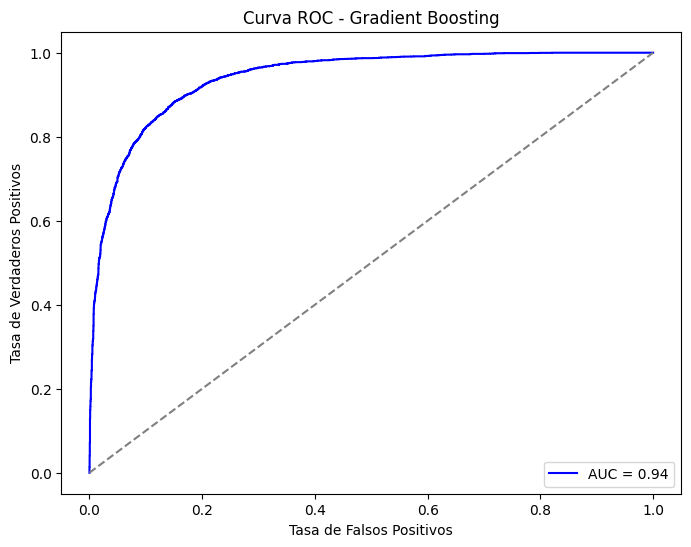

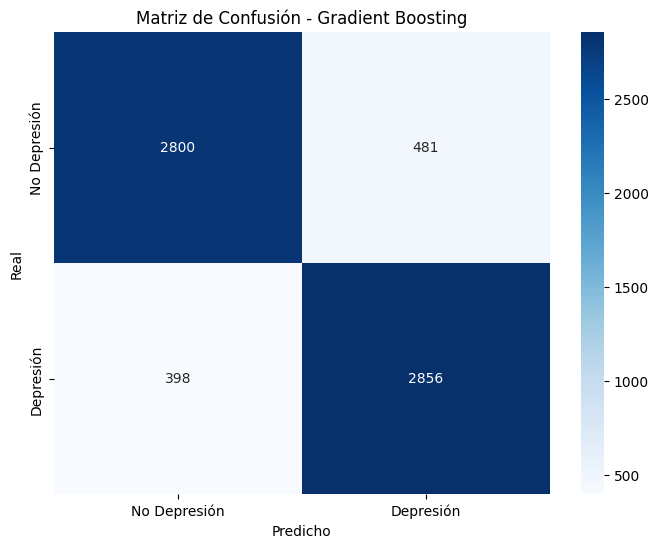

       Valor Real  Predicción  Probabilidad Predicción
17752           0           1                 0.645162
3053            1           1                 0.957957
21626           1           1                 0.798179
3946            0           0                 0.470938
5836            0           0                 0.085790


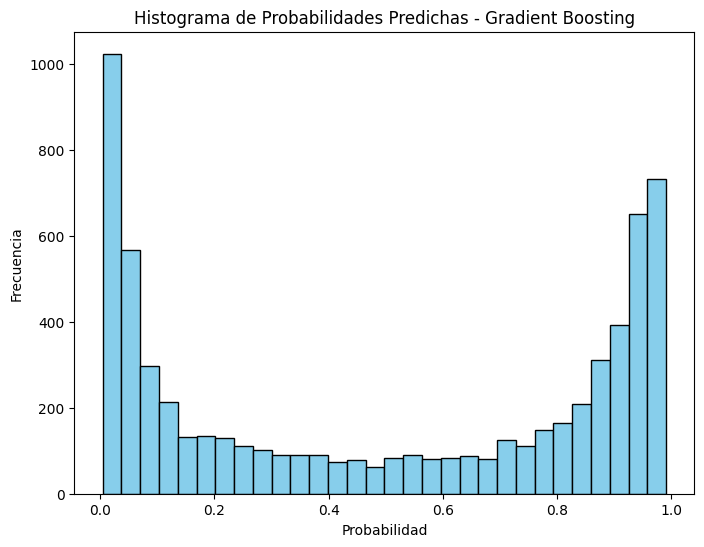

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc


# 1 - Gráfico de Predicciones vs. Realidad (Gráfico de dispersión)
# Este gráfico permite comparar las predicciones con los valores reales para ver qué tan bien se ajustan.

model_name = 'Gradient Boosting'  # Cambia según el modelo elegido
y_pred_gb = y_preds[model_name]  # Obtener las predicciones del modelo elegido


if len(y_test) == len(y_pred_gb):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_gb, alpha=0.5)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('Valor Real')
    plt.ylabel('Predicción del Modelo')
    plt.title(f'Predicciones vs. Realidad - {model_name}')
    plt.show()
else:
    print("Error: Las dimensiones de y_test y las predicciones no coinciden.")

# 2. Curva ROC (Receiver Operating Characteristic)
# La curva ROC ayuda a visualizar el rendimiento del modelo a través de diferentes umbrales de decisión.
# Recordar Un AUC cercano a 1 indica un buen rendimiento del modelo.
y_pred_prob = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])  # y_pred_prob son las probabilidades de la clase positiva
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title(f'Curva ROC - {model_name}')
plt.legend(loc='lower right')
plt.show()

# 3 - Matriz de Confusión
# Este gráfico es útil para ver cómo se distribuyen los valores reales contra las predicciones del modelo.
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Depresión", "Depresión"], yticklabels=["No Depresión", "Depresión"])
plt.title(f'Matriz de Confusión - {model_name}')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# 4. Visualización de Predicciones Individuales
# Este DataFrame muestra algunas predicciones junto con sus probabilidades, lo que permite observar los casos concretos.
predictions_df = pd.DataFrame({
    'Valor Real': y_test,
    'Predicción': y_pred_gb,
    'Probabilidad Predicción': y_pred_prob[:, 1]  # Probabilidades de la clase positiva
})
# Muestra las primeras filas
print(predictions_df.head())

# 5. Histograma de Probabilidades Predichas
# Este gráfico permite visualizar la distribución de las probabilidades predichas para la clase positiva,
# lo que nos ayuda a entender la confianza del modelo en sus predicciones.
plt.figure(figsize=(8, 6))
plt.hist(y_pred_prob[:, 1], bins=30, color='skyblue', edgecolor='black')
plt.title(f'Histograma de Probabilidades Predichas - {model_name}')
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.show()


**Análisis del modelo**

**1 - Gráfico de Predicciones vs. Realidad** (Gráfico de dispersión): Este gráfico muestra cómo se alinean las predicciones con los valores reales.
La gráfica  muestra que el modelo se ajusta bien a la línea de identidad, lo que sugiere una buena correlación entre los valores reales y los predichos, sin embargo, algunos puntos se alejan de la línea, lo que sugiere que hay casos en los que el modelo tiene dificultad para clasificar correctamente.

**2** - **Curva ROC y AUC:**
La curva ROC muestra una clara separación entre las clases, con un Área Bajo la Curva (AUC) de 0.94, lo que indica una alta capacidad del modelo para diferenciar entre las clases. Un AUC cercano a 1 sugiere que el modelo tiene un excelente rendimiento en términos de sensibilidad y especificidad.

**3 - Matriz de Confusión:** Se usa para mostrar la cantidad de aciertos y errores del modelo en términos de las dos clases (por ejemplo, "No Depresión" y "Depresión"). El modelo logró clasificar correctamente 2800 casos negativos (No Depresión) y 2586 casos positivos (Depresión), Presenta 431 falsos positivos (casos clasificados incorrectamente como Depresión) y 398 falsos negativos (casos de Depresión que el modelo no detectó).

La cantidad de falsos negativos es relativamente baja, lo cual es clave en aplicaciones donde identificar correctamente los casos positivos es fundamental.

**4 - Visualización de Predicciones Individuales**: Se crea un DataFrame con las predicciones y las probabilidades correspondientes, lo que  permitirá ver ejemplos específicos de las predicciones.

**5 - Histograma de Probabilidades Predichas**: Muestra cómo se distribuyen las probabilidades predichas para la clase positiva, lo que  da una idea de la confianza del modelo en sus predicciones.

Este histograma muestra que las predicciones tienden a concentrarse en valores cercanos a 0 y 1, lo que indica que el modelo es bastante seguro en sus decisiones y no tiende a hacer predicciones con baja confianza.

# **Respuestas objetivo y Conclusiones Finales**

Realizada la transformación del dataset y el posterior análisis de los insights llego a la conclusiones finales respondiendo las preguntas planteadas en la presentación del proyecto:

**¿Existen diferencias significativas según género, edad o ciudad de residencia?**

En hombre y mujeres, la cantidad de personas sin depresión es menor que la cantidad de personas con depresión. A simple vista, parece que hay una diferencia en las proporciones entre géneros, donde visualizamos una mayor cantidad de hombres con depresión que mujeres pero la prueba T arrojó que NO se puede afirmar que el género influya significativamente en los niveles de depresión en esta muestra. Posteriormente vimos en la matriz de correlación que la relación del genero con la depresión es 0.0018 lo cual es muy bajo, por lo cual pudimos confirmar por dos medios distintos que el Género no tiene incidencia directa en la depresión del individuo

En cuanto a la ciudad luego de trasformar la variable a numérica pudimos incluirla en la matriz de correlación donde arrojó un resultado de 0.025, también es muy bajo por lo cual concluímos que la ciudad donde habita el individuo con es un factor con gran incidencia en la depresión de las personas.

Por último para el caso de la edad si encontramos una correlacción más significativa -0,23. Este si es un valor considerable por lo cual concluímos que la edad tiene una correlación negativa y medianamente significativa en la depresión de los estudiantes. Esto lo pudimos confirmar también con el radar, donde vimos el perfíl promedio de los estudiantes y se cumplía que quienes no padecían depresión tenían una edad más avanzada. Entiendo que esta relación puede responder a la falta de estabilidad o mayor presión académica y social en edades tempranas, también puede suponer que las personas que realizan estudios y están más avanzados en edad lo hacen por convencimiento y disfrute de la carrera


**¿el historial familiar respecto a la salud mental influye en la probabilidad de que el individuo tenga depresión?**

A pesar de que en la matriz de correlación esta variable arrojó un resultado de 0.053 lo cual es muy bajo y concluí que no tiene relación con la depresión de los estudiantes. luego en el radar pude ver el que en el perfil de estudiantes con depresión en su mayoría tiene antecedentes de enfermedades mentales en la familia. Sinceramente tengo dudas si cometí algún error en el modelo y la correlación alcanzada no es correcta, sería una variable que me gustaría intentar mejorar porque pienso que debe tener una mayor influencia en las personas. Pero yendo a las conclusiones con los valores alcanzados debo decir que no es una variable que tenga una influencia determinante en la depresión de los estudiantes


**¿Cómo afectan la presión laboral, académica y financiera en la depresión del individuo?**

Una mención importante es que es este modelo tuve que dropear las columnas referente a la información laboral porque solo se había completado en 3 líneas de todo el dataset, con tan poca información no pude utilizar ninguna estrategia para rellenar los vacíos, pero en un caso real sería importante destacar la importancia de recabar esta información correctamente porque pueden ser características determinantes en la depresión de los estudiantes.

En cuanto a la presión academica nos encontramos con una correlación muy alta lo cual indica que el estrés educativo es un factor relevante a considerar. Por su parte el estrés financiero también tienen una relación positiva con la depresión, lo que sugiere que la incertidumbre económica puede afectar la salud mental de los individuos.




**¿Qué factores tienen mayor peso en el desarrollo de depresión en estudiantes?**

Tanto en la matriz de correlación como en el radar con el perfil de estudiantes alcanzamos resultados similares respecto a la incidencia de las variables en la depresión de las personas, La variable con mayor relación identificada es ¿has tenido pensamientos suicidas?. Tiene mucha lógica que sea así, una persona que se ha planteado quitarse la vida es probable que este atravesando un profunda depresión. esta información es muy importante y tal cula lo vemos en la matriz deberíamos ser muy proactivo con los casos que hayan respondido si a esta pregunta. Es importante tener planes de apoyo y contención para acompañar y ayudar a salir adelante a los estudiantes que estén atravesando este tipo de situaciones
  
**¿Cómo podríamos usar estos datos para generar alertas tempranas y apoyar a los estudiantes a tiempo?**

Los resultados obtenidos con el modelo de Gradient Boosting muestran que la predicción del riesgo de depresión en estudiantes es altamente efectiva, con un AUC de 0.94, lo que indica que el modelo tiene una gran capacidad para diferenciar entre estudiantes en riesgo y aquellos que no lo están.

La matriz de confusión nos indica que el modelo identifica correctamente la mayoría de los casos de depresión y mantiene un bajo número de falsos negativos. Esto es fundamental, ya que una de las mayores preocupaciones en el ámbito de la salud mental es la falta de detección temprana.


Gracias a la capacidad predictiva del modelo, podemos utilizar sus resultados para desarrollar un sistema de alerta temprana que notifique a las instituciones educativas y de salud mental sobre estudiantes en riesgo antes de que la situación se agrave. Esto nos permitiría una revolución en la salud mental actual, logrando como impacto por ejemplo:

Intervenciones tempranas, como asesoramiento psicológico o actividades de bienestar emocional.
Personalización del apoyo académico y social, adaptando las estrategias de acompañamiento según el nivel de riesgo identificado.
Seguimiento continuo, donde se puedan actualizar las probabilidades de riesgo con nuevos datos y ajustar las estrategias de prevención en tiempo real.
  
  
**¿Podemos predecir con precisión qué estudiantes tienen más probabilidades de estar en riesgo?**

La efectividad del modelo sugiere que sí podemos predecir con precisión qué estudiantes tienen más probabilidades de estar en riesgo. El histograma de probabilidades muestra que las predicciones tienden a ser claras (cercanas a 0 o 1), lo que indica un alto grado de confianza en las clasificaciones.

Además, al observar que la mayoría de los casos positivos son correctamente identificados, podemos afirmar que este tipo de modelos pueden servir como una herramienta objetiva y basada en datos para ayudar a los profesionales de la salud mental y la educación a tomar decisiones informadas sobre intervenciones preventivas.

Si las instituciones de salud mental y educativas unen esfuerzos para implementar modelos como este, podrían generar un impacto transformador en la prevención del riesgo emocional y psicológico en estudiantes.

**¿Que impacto podría tener el uso del modelo de machine learning construido para el caso de estudio?**

utilizaré esta pregunta para desarrollar la conclusión final de mi proyecto y modelo predictivo.

Si las instituciones de salud mental y educativas unen esfuerzos para implementar modelos como este, podrían generar un impacto transformador en la prevención del riesgo emocional y psicológico en estudiantes. Algunas estrategias clave podrían ser:

**1 - Integración de la inteligencia artificial en las plataformas educativas:**

Permitir que el modelo analice datos en tiempo real y envíe alertas a consejeros y docentes.

Diseñar tableros interactivos donde se puedan monitorear tendencias de riesgo a nivel individual y grupal.

**2 - Creación de protocolos de acción basados en datos**

Establecer respuestas personalizadas según el nivel de riesgo detectado.

Capacitar a docentes y orientadores en el uso de estos datos para brindar un mejor acompañamiento.

**3 - Colaboración entre psicólogos, educadores y científicos de datos**

Usar la información generada por el modelo para mejorar programas de bienestar estudiantil.

Realizar estudios longitudinales para validar y mejorar la precisión del modelo con el tiempo.

Este enfoque no solo permitiría identificar a los estudiantes en riesgo, sino que también ayudaría a diseñar estrategias preventivas más eficientes y a mejorar el bienestar general de la comunidad educativa.

**Hoy en día, la detección temprana de problemas de salud mental en estudiantes sigue siendo una gran deuda en muchas instituciones. Un modelo predictivo como este podría cambiar vidas, permitiendo actuar antes de que sea demasiado tarde. No solo estaríamos reduciendo la incidencia de la depresión, sino que también podríamos marcar la diferencia en el futuro de muchos jóvenes: con el apoyo adecuado en el momento oportuno, más estudiantes tendrían la oportunidad de continuar y finalizar sus estudios. Esto no solo impactaría a nivel individual, sino que, a largo plazo, fortalecería la realidad socioeconómica de todo un país. La tecnología y la ciencia de datos nos dan hoy la posibilidad de hacer lo que antes parecía imposible. Es momento de utilizar estos avances para generar un cambio real.**